# Tarea 7: Ajuste de curvas

### Escalera de Tukey

Basado en la **escalera de Tukey** (referencia: Libro (S)), se crea la siguiente función, para encontrar el $\lambda$  que maximiza la correlación.

In [1]:
lambda <- function (x,y){
     if (min(y) < 0){
        y<-y+abs(min(y))+0.01
    }
        
    cc <- numeric()
    lambda <- seq(-10, 10, .01)
    
    for (i in lambda){
        if (i == 0)
            cc <- c(cc, cor(x, log(y)))
        else if (i > 0)
            cc <- c(cc, cor(x, y**i))
        else
            cc <- c(cc, cor(x, -(y**i)))
    }

    return (lambda[which.max(cc)])
}

Se considera un conjunto $x$ y un conjunto $y$ que depende de alguna manera de $x$. La función ```ajuste_curva``` depende de la función ```lambda```, lo que hace es, primeramente encontrar el $\lambda$, dependiendo de este valor, se realiza la transformada correspondiente para poder llegar a una relación lineal. Con la función ```lm``` se busca encontrar los coeficientes de la relación real. La función te regresa una gráfica con los valores reales (color negro) y los valores ajustados (color azul).

In [43]:
ajuste_curva <- function(x,y){
    
    if (min(y) < 0){
        y<-y+abs(min(y))+0.01
    }
    
    lam <- lambda(x,y)
    if (abs(lam) < 0.1){
        fit <- lm(log(y)~x)
        y2 <- x*fit$coefficients[2]+fit$coefficients[1]
        plot(x,y/100000000,col=rgb(0.4,0.4,0.8,0.6),pch=16 , cex=1.3, las=1,font.lab=1, cex.lab=1.7, xlab="", ylab="cien millones")
        lines(x, exp(y2)/100000000, col =rgb(0,0,0,0.9), pch=16, lwd = 2, )
    }
    else  if(lam >= 0.1){
        fit <- lm (y**lam~x)
        y2 <- x*fit$coefficients[2]+fit$coefficients[1]
        #par(mfrow = c(1,2))
        plot(x,y,col=rgb(0.4,0.4,0.8,0.6),pch=16 , cex=1.3, las=1,font.lab=1, cex.lab=1.7,xlab="", ylab="millones")
        points(x,(y2^(1/lam)), col=rgb(0,0,0,0.5), pch=16, lwd = 2)
        #legend(50, 1, legend=c("Real", "Ajustada"), col=c(rgb(0.4,0.4,0.8,0.6), rgb(0,0,0,0.9)), pch=16:16, cex=1.2)
        #plot(y**lam~x)
        #lines(y2~x, col="blue")
    }
        else{
        fit <- lm (y**lam~x)
        y2  <- -x*fit$coefficients[2]-fit$coefficients[1]
        plot(y~x,col=rgb(0.4,0.4,0.8,0.6),pch=16 , cex=1.3, las=1,font.lab=1, cex.lab=1.7,xlab="", ylab="")
        points(x, y2^(1/lam), col=rgb(0,0,0,0.5), pch=16, lwd=2)
        }
}

Se trabaja con una relación sencilla, del tipo cuadrática, y se le agrega un ruido a dicha relación. 

In [9]:
x1 <- sample(1:500,100)
y1 <- 4*x1^2
r1 <- rnorm(length(x1), mean=3000, sd=30000)
yr1 <- y1 + r1

In [4]:
options(scipen = 5)

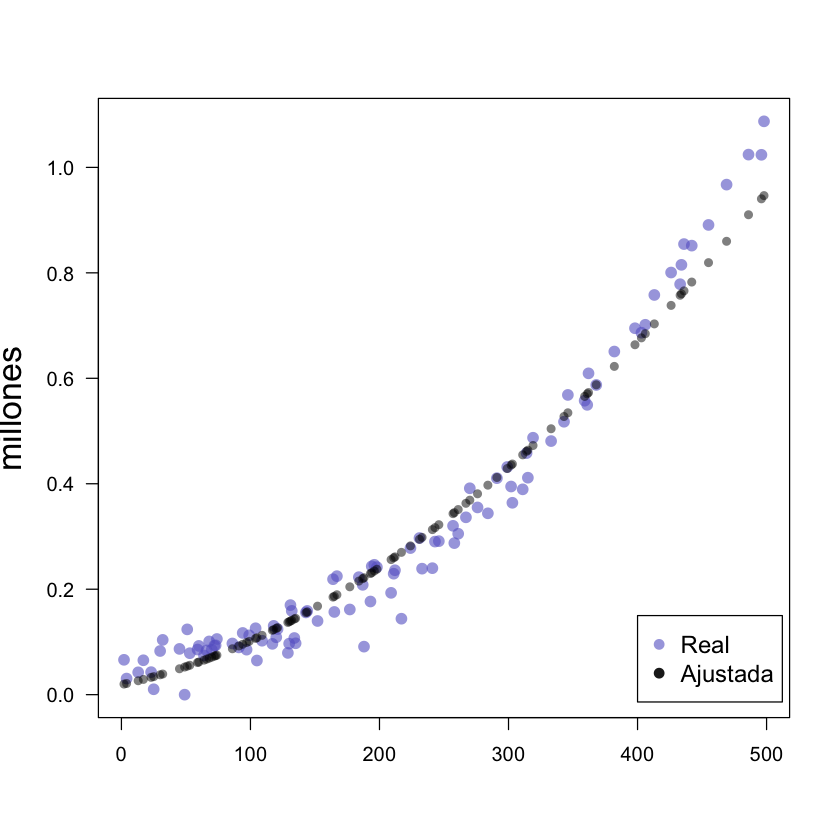

In [12]:
ajuste_curva(x1,yr1)
legend(400, 0.15, legend=c("Real", "Ajustada"), col=c(rgb(0.4,0.4,0.8,0.6), rgb(0,0,0,0.9)), pch=16:16, cex=1.2)

In [13]:
png(file="cuadratica.png",
    width=3000, height=3000, res = 400)
#par(mar=c(5,5,5,3))
ajuste_curva(x1,yr1)
legend(400, 0.15, legend=c("Real", "Ajustada"), col=c(rgb(0.4,0.4,0.8,0.6), rgb(0,0,0,0.9)), pch=16:16, cex=1.2)
dev.off()

pdf 
  2

Ahora, con una relación de raíz cuadrática.

In [16]:
x2 <- sample(1:500,100)
y2 <- 4*sqrt(x2) + 10
r2 <- rnorm(length(x2), mean=1, sd=3)
yr2 <- y2 + r2

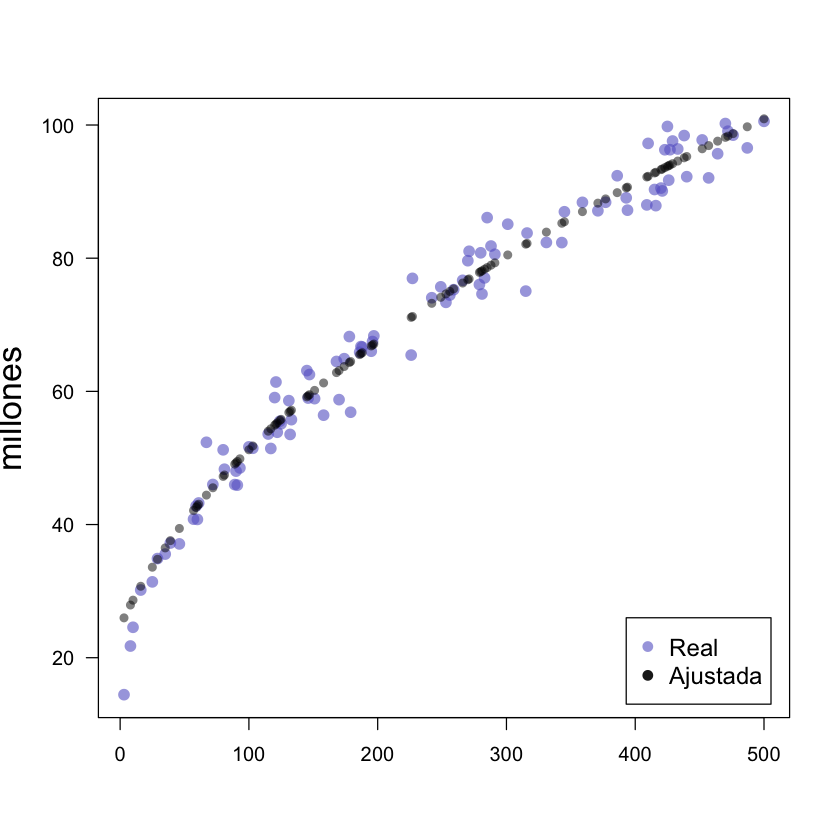

In [21]:
ajuste_curva(x2,yr2)
legend(393, 26, legend=c("Real", "Ajustada"), col=c(rgb(0.4,0.4,0.8,0.6), rgb(0,0,0,0.9)), pch=16:16, cex=1.2)

In [984]:
png(file="raíz.png",
    width=3000, height=3000, res = 400)
#par(mar=c(5,5,5,3))
ajuste_curva(x2,yr2)
legend(393, 26, legend=c("Real", "Ajustada"), col=c(rgb(0.4,0.4,0.8,0.6), rgb(0,0,0,0.9)), pch=16:16, cex=1.2)
dev.off()

pdf 
  2

In [23]:
x3 <- seq(0,10,0.05)
y3 <- 0.07*exp(x3)
r3 <- rnorm(length(x3), mean=0, sd=0.2)
yr3 <- y3 + r3

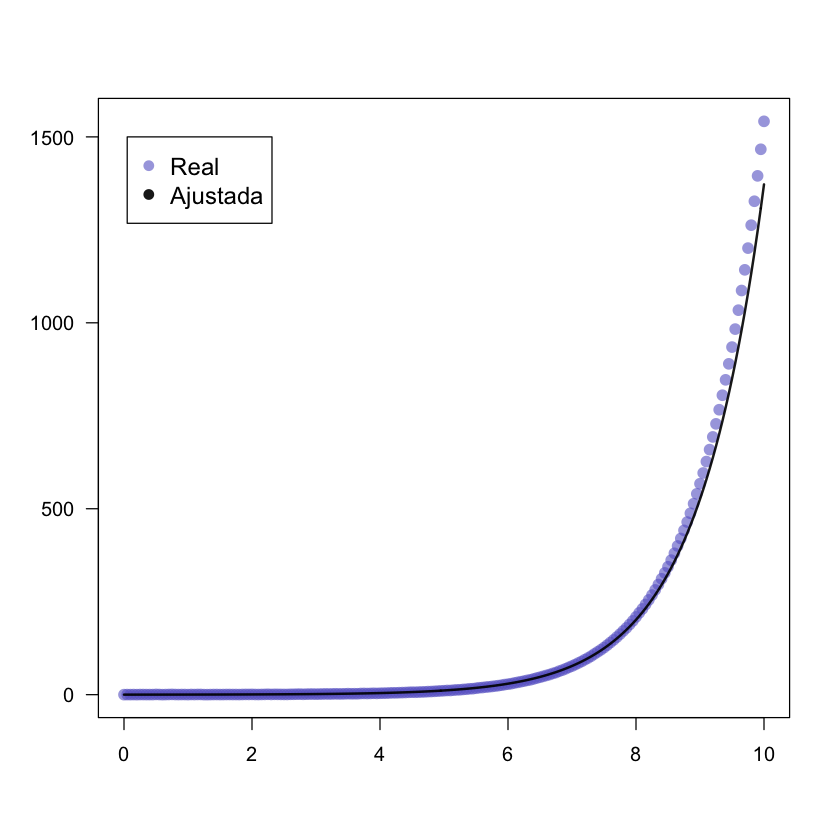

In [34]:
ajuste_curva(x3,yr3)
legend(0.05, 1500, legend=c("Real", "Ajustada"), col=c(rgb(0.4,0.4,0.8,0.6), rgb(0,0,0,0.9)), pch=16:16, cex=1.2)

In [1071]:
png(file="exponencial.png",
    width=3000, height=3000, res = 400)
#par(mar=c(5,5,5,3))
ajuste_curva(x3,yr3)
legend(0.05, 1500, legend=c("Real", "Ajustada"), col=c(rgb(0.4,0.4,0.8,0.6), rgb(0,0,0,0.9)), pch=16:16, cex=1.2)
dev.off()

pdf 
  2

In [66]:
x <- c(1910, 1921, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 1995, 2000, 2005, 2010, 2015)
y <- c(15160369, 14334780, 16552722, 19653552, 25791017, 34923129, 48225238, 66846833, 81249645, 91158290, 97483412, 103263388, 112336538, 119938473)

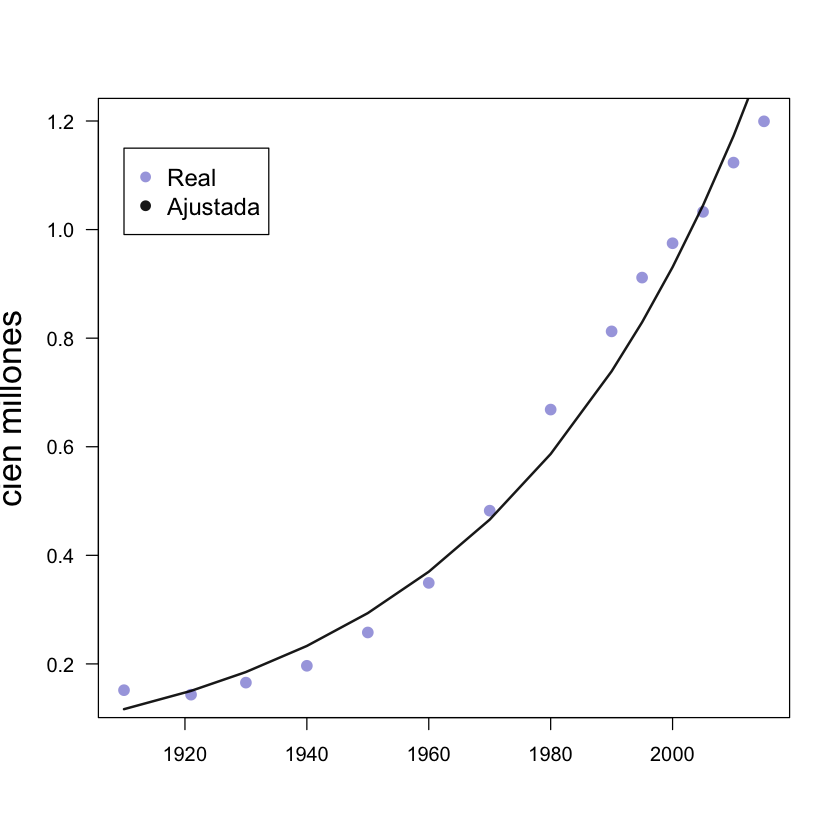

In [44]:
ajuste_curva(x,y)
legend(1910,1.15, legend=c("Real", "Ajustada"), col=c(rgb(0.4,0.4,0.8,0.6), rgb(0,0,0,0.9)), pch=16:16, cex=1.2)

In [68]:
png(file="población.png",
    width=6000, height=3000, res = 400)
par(mar=c(5,5,5,3))
ajuste_curva(x,y)
legend(1910,1.15, legend=c("Real", "Ajustada"), col=c(rgb(0.4,0.4,0.8,0.6), rgb(0,0,0,0.9)), pch=16:16, cex=1.2)
dev.off()

pdf 
  2

In [743]:
x1log <- sample(100:600, 300, replace=FALSE)
x2log <- sample(400:800, 300, replace=FALSE)
x3log <- sample(50:600, 300, replace=FALSE)

In [747]:
ylog = x1log + .4*log(x2log) + 4*x3log

In [745]:
lm(y ~ x1log + log(x2log) + x3log)


Call:
lm(formula = y ~ x1log + log(x2log) + x3log)

Coefficients:
(Intercept)        x1log   log(x2log)        x3log  
  8.402e-13    1.000e+00    4.000e-01    4.000e+00  


In [1118]:

x <- runif(300,  min=-10, max=10) 
y <- 0.1*x^3 - 0.5 * x^2 - x + 10 + rnorm(length(x),0,8) 

png(file="polinomio1.png",
    width=3000, height=3000, res = 400)
#par(mar=c(5,5,5,3))

# plot of x and y :
plot(x,y,col=rgb(0.4,0.4,0.8,0.6),pch=16 , cex=1.3, las=1, ylab="", xlab="") 
 
# Can we find a polynome that fit this function ?
model <- lm(y ~ x + I(x^2) + I(x^3))
 
# I can get the features of this model :
#summary(model)
#model$coefficients
#summary(model)$adj.r.squared
 
# For each value of x, I can get the value of y estimated by the model, and add it to the current plot !
myPredict <- predict( model ) 
ix <- sort(x,index.return=T)$ix
lines(x[ix], myPredict[ix], col=2, lwd=2 )  
legend(5.5,-105, legend=c("Real", "Ajustada"), col=c(rgb(0.4,0.4,0.8,0.8), "red"), pch=16:16, cex=1.2)

# I add the features of the model to the plot
coeff <- round(model$coefficients , 2)
#text(3, -70 , paste("Model : ",coeff[1] , " + " , coeff[2] , "*x"  , "+" , coeff[3] , "*x^2" , "+" , coeff[4] , "*x^3" , "\n\n" , "P-value adjusted = ",round(summary(model)$adj.r.squared,2)))
dev.off()

pdf 
  2

In [1124]:
x <- runif(500,  min=-1000, max=1000) 
y <- 0.1*x^5 +0.5*x^3 - 0.4 * x^2 - 0.3* x + 20 + rnorm(length(x),1e10,6e12) 

png(file="polinomio2.png",
    width=3000, height=3000, res = 400)
# plot of x and y :
plot(x,y/1e14,col=rgb(0.4,0.4,0.8,0.6),pch=16 , cex=1.3,ylab="", xlab="", las=1) 
 
# Can we find a polynome that fit this function ?
model <- lm(y ~ x + I(x^2) + I(x^3) + I(x^5))
 
# I can get the features of this model :
#summary(model)
#model$coefficients
#summary(model)$adj.r.squared
 
# For each value of x, I can get the value of y estimated by the model, and add it to the current plot !
myPredict <- predict( model ) 
ix <- sort(x,index.return=T)$ix
lines(x[ix], myPredict[ix]/1e14, col=2, lwd=2 )  
legend(590,-0.75, legend=c("Real", "Ajustada"), col=c(rgb(0.4,0.4,0.8,0.8), "red"), pch=16:16, cex=1.2)
# I add the features of the model to the plot
coeff <- round(model$coefficients , 2)
#text(4, -70 , paste("Model : ",coeff[1] , " + " , coeff[2] , "*x"  , "+" , coeff[3] , "*x^2" , "+" , coeff[4] , "*x^3" ,"+" , coeff[5] , "*x^4" , "\n\n" , "P-value adjusted = ",round(summary(model)$adj.r.squared,2)))
dev.off()

pdf 
  2

In [1124]:
x <- runif(500,  min=-1000, max=1000) 
y <- 0.1*x^5 +0.5*x^3 - 0.4 * x^2 - 0.3* x + 20 + rnorm(length(x),1e10,6e12) 

#png(file="polinomio3.png",
#    width=3000, height=3000, res = 400)
# plot of x and y :
plot(x,y,col=rgb(0.4,0.4,0.8,0.6),pch=16 , cex=1.3,ylab="", xlab="", las=1) 
 
# Can we find a polynome that fit this function ?
model <- lm(y ~ x + I(x^2) + I(x^3) + I(x^5))
 
# I can get the features of this model :
#summary(model)
#model$coefficients
#summary(model)$adj.r.squared
 
# For each value of x, I can get the value of y estimated by the model, and add it to the current plot !
myPredict <- predict( model ) 
ix <- sort(x,index.return=T)$ix
lines(x[ix], myPredict[ix], col=2, lwd=2 )  
legend(590,-0.75, legend=c("Real", "Ajustada"), col=c(rgb(0.4,0.4,0.8,0.8), "red"), pch=16:16, cex=1.2)
# I add the features of the model to the plot
coeff <- round(model$coefficients , 2)
#text(4, -70 , paste("Model : ",coeff[1] , " + " , coeff[2] , "*x"  , "+" , coeff[3] , "*x^2" , "+" , coeff[4] , "*x^3" ,"+" , coeff[5] , "*x^4" , "\n\n" , "P-value adjusted = ",round(summary(model)$adj.r.squared,2)))
#dev.off()

pdf 
  2